# Import modules

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
import math

# Read in data

In [2]:
df = pd.read_csv('whisky.csv')
df_orig = df.copy()

# Describe data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 10.8+ KB


# Explore data

In [4]:
df.columns

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
# df.profile_report()

In [6]:
dtype_dict = df.dtypes.apply(str).reset_index().groupby(0)['index'].apply(lambda g: list(g.values)).to_dict()

In [7]:
for dtype, cols in dtype_dict.items():
    print(dtype)
    print(' '*5,cols)

int64
      ['RowID', 'Body', 'Sweetness', 'Smoky', 'Medicinal', 'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity', 'Floral', 'Latitude', 'Longitude']
object
      ['Distillery', 'Postcode']


In [8]:
df.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


# Clean data

In [9]:
# remove incorrect lat long values
df = df.drop(columns=['Latitude','Longitude'])

In [10]:
# clean postcode column
df['Postcode'] = df['Postcode'].str.replace('\t','').str.strip()
df = df.rename(columns={'Postcode':'postcode'})

In [11]:
# read in postcode data
dfpc = pd.read_csv('ukpostcodes.csv')

In [12]:
# merge lat long data with postcode data
df = df.merge(dfpc,left_on='postcode', right_on='postcode',how='left')

In [13]:
#define conversion and rotation functions
def longlat_to_xy(s):
    R = 6371 #Earth radius in km
    x = R*math.cos((math.pi/180)*s['latitude'])*math.cos((math.pi/180)*s['longitude'])
    y = R*math.cos((math.pi/180)*s['latitude'])*math.sin((math.pi/180)*s['longitude'])
    return pd.Series([x,y],index=['x','y'])

def rotate_xy(s,theta):
    x,y = s['x'],s['y']
    x_n = x*math.cos((math.pi/180)*theta) - y*math.sin((math.pi/180)*theta)
    y_n = y*math.cos((math.pi/180)*theta) + x*math.sin((math.pi/180)*theta)
    return pd.Series([x_n,y_n],index=['x','y'])

In [14]:
# convert to x, y
df[['x','y']] = df.apply(longlat_to_xy,axis=1)

In [15]:
# rotate -90 deg
df[['x','y']] = df.apply(rotate_xy,theta=-90,axis=1)

In [16]:
# rescale axis
df['x'] = df['x']-df['x'].min()
df['y'] = df['y']-df['y'].min()
x_size = 5
y_size = x_size * df['y'].max()/df['x'].max()

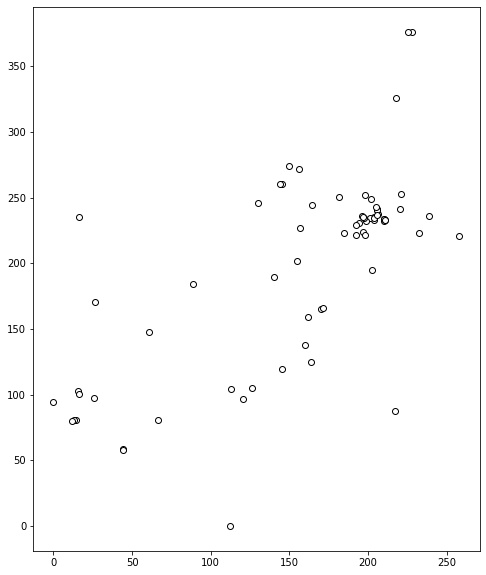

In [17]:
#plot results
fig,ax=plt.subplots(figsize=(8,10))
ax.scatter(df['x'], df['y'],c='white',ec='k')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 85
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RowID       86 non-null     int64  
 1   Distillery  86 non-null     object 
 2   Body        86 non-null     int64  
 3   Sweetness   86 non-null     int64  
 4   Smoky       86 non-null     int64  
 5   Medicinal   86 non-null     int64  
 6   Tobacco     86 non-null     int64  
 7   Honey       86 non-null     int64  
 8   Spicy       86 non-null     int64  
 9   Winey       86 non-null     int64  
 10  Nutty       86 non-null     int64  
 11  Malty       86 non-null     int64  
 12  Fruity      86 non-null     int64  
 13  Floral      86 non-null     int64  
 14  postcode    86 non-null     object 
 15  id          71 non-null     float64
 16  latitude    71 non-null     float64
 17  longitude   71 non-null     float64
 18  x           71 non-null     float64
 19  y           71 non-null     flo

# Impute missing values

In [19]:
# get distillery names with missing long lat lookup values
missing = df[df['x'].isna()]['Distillery']
missing_names = missing.values
missing_idx = missing.index

In [20]:
missing_codes_start = df_orig[df_orig['Distillery'].isin(missing_names)]['Postcode'].str.replace('\t','').str.strip().str.split(expand=True)[0].reset_index(drop=True)

In [21]:
dft = df[['postcode','x','y']].copy()
dft['code_start'] = dft['postcode'].str.split(expand=True)[0]

In [22]:
codes_start_means = dft.groupby('code_start')[['x','y']].mean()

In [23]:
missing_codes_start_means = codes_start_means.loc[missing_codes_start]

In [24]:
missing_codes_start_means = missing_codes_start_means.drop_duplicates().dropna()

In [25]:
missing_val_dict = missing_codes_start_means.T.to_dict('list')

In [26]:
def fill_missing_value(s):
    code = s['postcode'].split()[0].strip()
    try: res = missing_val_dict[code]
    except: res = [None,None]
    return res

In [27]:
res = df[df['Distillery'].isin(missing_names)].apply(fill_missing_value,axis=1)
df.loc[missing_idx,'x'] = res.apply(lambda x: x[0])
df.loc[missing_idx,'y'] = res.apply(lambda x: x[1])

# Final data

In [34]:
# drop rows with no lat long lookup value
records_dropped = df[df['x'].isna()]
df = df[df['x'].notna()].reset_index(drop=True)
df = df.drop(columns=['postcode','id','latitude','longitude','RowID'])

In [36]:
records_dropped

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,postcode,id,latitude,longitude,x,y
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,AB5 5LI,NaN,NaN,NaN,NaN,NaN
18,19,Bowmore,2,2,3,1,0,2,2,1,1,1,1,2,PA43 7GS,NaN,NaN,NaN,NaN,NaN
23,24,Clynelish,3,2,3,3,1,0,2,0,1,1,2,0,KW9 6LB,NaN,NaN,NaN,NaN,NaN
32,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,NaN,NaN,NaN,NaN,NaN
67,68,OldFettercairn,1,2,2,0,1,2,2,1,2,3,1,1,AB30 1YE,NaN,NaN,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Distillery  81 non-null     object 
 1   Body        81 non-null     int64  
 2   Sweetness   81 non-null     int64  
 3   Smoky       81 non-null     int64  
 4   Medicinal   81 non-null     int64  
 5   Tobacco     81 non-null     int64  
 6   Honey       81 non-null     int64  
 7   Spicy       81 non-null     int64  
 8   Winey       81 non-null     int64  
 9   Nutty       81 non-null     int64  
 10  Malty       81 non-null     int64  
 11  Fruity      81 non-null     int64  
 12  Floral      81 non-null     int64  
 13  x           81 non-null     float64
 14  y           81 non-null     float64
dtypes: float64(2), int64(12), object(1)
memory usage: 9.2+ KB


In [37]:
df.head()

,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,x,y
0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,161.631967,159.196369
1,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,203.945680,235.307777
2,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,14.327041,80.771859
3,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,232.450057,222.859796
4,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,66.625977,81.029302


In [38]:
df.to_csv('whisky_clean.csv')